In [5]:
import csv
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
plt.style.use('./deeplearning.mplstyle')

# Initialize empty lists to store the data
data = []

flowers = {
    "Iris-setosa": 0,
    "Iris-versicolor": 1,
    "Iris-virginica": 2,
}

# The length of features and targets must be equal.
features = [] # X 2-D array of features for the flowers
targets = [] # y, the targets or flower from 0 - 2

with open("./iris/iris.data", newline='') as csv_file:
    csv_reader = csv.reader(csv_file)

    for row in csv_reader:
        if len(row) == 0:
            continue

        features.append(row[:len(row)-1])
        flower_id = flowers[row[len(row)-1]]
        targets.append(flower_id)
        data.append(row)

X = np.array(features, dtype=float)
y = np.array(targets)

columns = ["sepal_length", "sepal_width", "petal_length", "petal_width", "species"]
df = pd.DataFrame(data, columns=columns)

print(X)
print(y)





[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.1 1.5 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

#### 4.2.1 View the variables
Let's get more familiar with your dataset.
- A good place to start is to print out each variable and see what it contains.

The code below prints the first element in the variables `X` and `y`.



In [6]:
print ('The first element of X is: ', X[0])
print ('The first element of y is: ', y[0])
print ('The last element of y is: ', y[-1])



The first element of X is:  [5.1 3.5 1.4 0.2]
The first element of y is:  0
The last element of y is:  2


#### 4.2.2 Check the dimensions of your variables

Another way to get familiar with your data is to view its dimensions. Please print the shape of `X` and `y` and see how many training examples you have in your dataset.

In [7]:
print ('The shape of X is: ' + str(X.shape))
print ('The shape of y is: ' + str(y.shape))

The shape of X is: (150, 4)
The shape of y is: (150,)


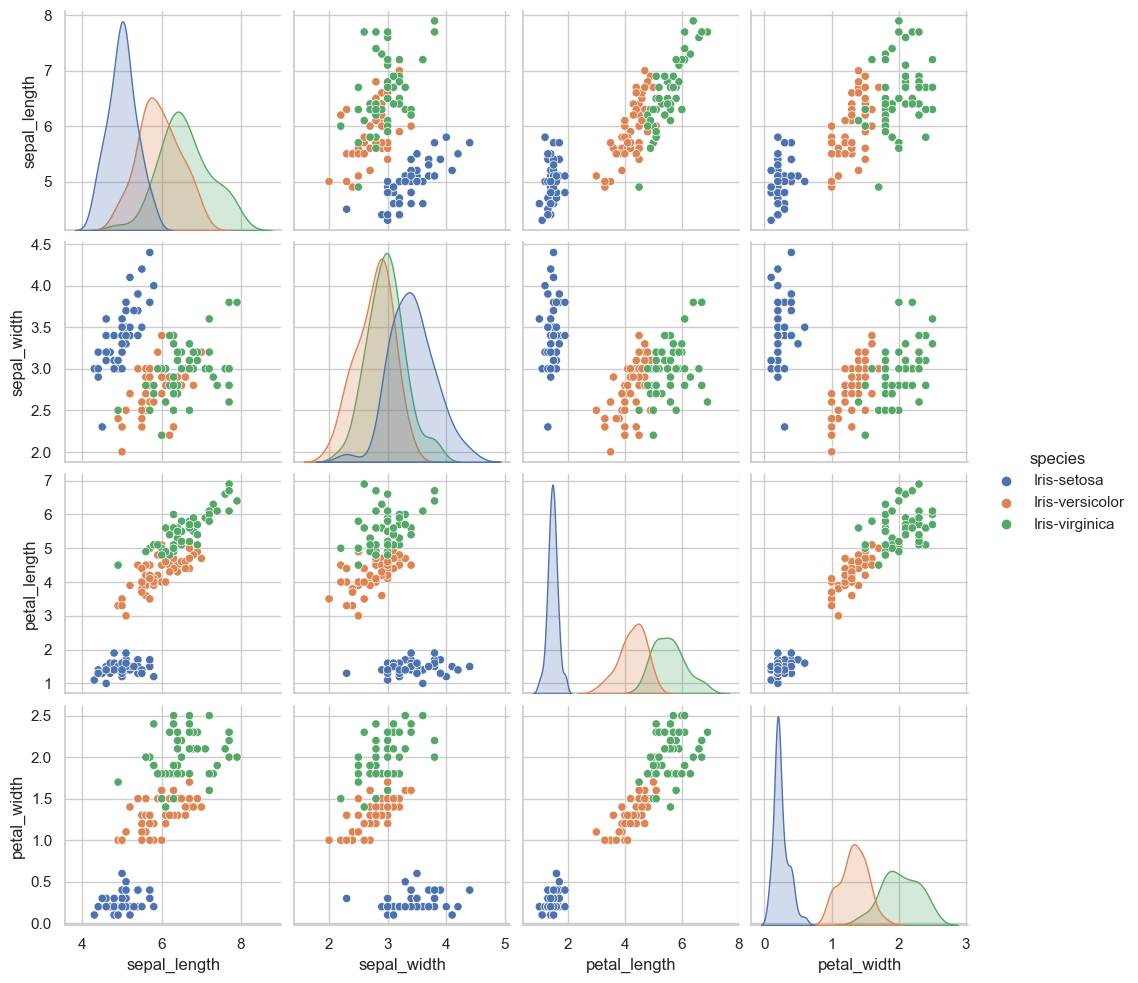

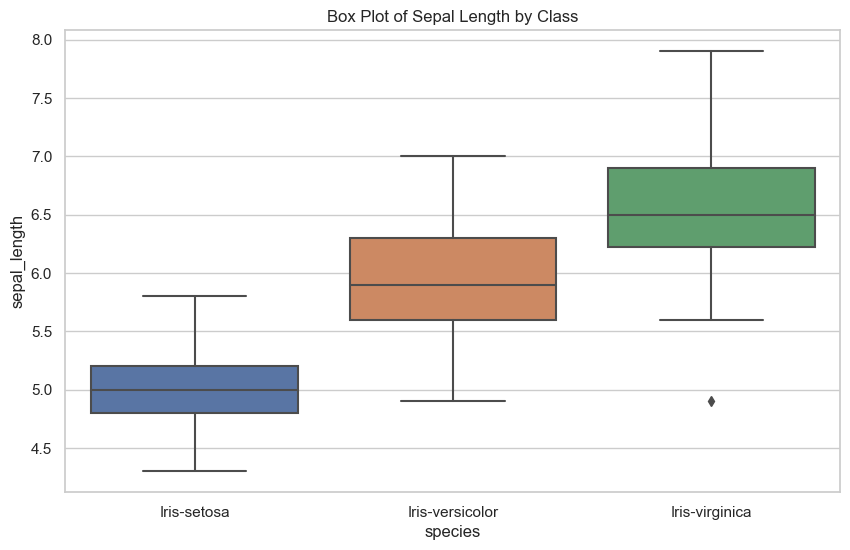

In [8]:
import seaborn as sns

# Convert data types to numeric
feature_columns = ["sepal_length", "sepal_width", "petal_length", "petal_width"]
# Convert data types to numeric
df[feature_columns] = df[feature_columns].apply(pd.to_numeric)

# Set the style for Seaborn
sns.set(style="whitegrid")

# Scatter Plot Matrix
sns.pairplot(df, hue="species")
plt.show()

# Box Plot
plt.figure(figsize=(10, 6))
sns.boxplot(x="species", y="sepal_length", data=df)
plt.title("Box Plot of Sepal Length by Class")
plt.show()



### 4.3 Model representation

The neural network you will use in this assignment is shown in the figure below. 
- This has two dense layers with Rectified Linear Unit (ReLU) activations followed by an output layer with a linear activation. 
    - Recall that our inputs are four flower attributes, so this gives us 4 inputs

<img src="model_NN.jpg" width="600" height="450">

- The parameters have dimensions that are sized for a neural network with $25$ units in layer 1, $15$ units in layer 2 and $3$ output units in layer 3, one for each flower type encoding.

    - Recall that the dimensions of these parameters is determined as follows:
        - If network has $s_{in}$ units in a layer and $s_{out}$ units in the next layer, then 
            - $W$ will be of dimension $s_{in} \times s_{out}$.
            - $b$ will be a vector with $s_{out}$ elements
  
    - Therefore, the shapes of `W`, and `b`,  are 
        - layer1: The shape of `W1` is (4, 25) and the shape of `b1` is (25,)
        - layer2: The shape of `W2` is (25, 15) and the shape of `b2` is: (15,)
        - layer3: The shape of `W3` is (15, 3) and the shape of `b3` is: (3,)
>**Note:** The bias vector `b` could be represented as a 1-D (n,) or 2-D (n,1) array. Tensorflow utilizes a 1-D representation and this lab will maintain that convention: 




### 4.4 Tensorflow Model Implementation

Tensorflow models are built layer by layer. A layer's input dimensions ($s_{in}$ above) are calculated for you. You specify a layer's *output dimensions* and this determines the next layer's input dimension. The input dimension of the first layer is derived from the size of the input data specified in the `model.fit` statement below. 

>**Note:** It is also possible to add an input layer that specifies the input dimension of the first layer. For example:  
`tf.keras.Input(shape=(400,)),    #specify input shape`




### 4.5 Softmax placement
As described in the lecture and the optional softmax lab, numerical stability is improved if the softmax is grouped with the loss function rather than the output layer during training. This has implications when *building* the model and *using* the model.  
Building:  
* The final Dense layer should use a 'linear' activation. This is effectively no activation. 
* The `model.compile` statement will indicate this by including `from_logits=True`.
`loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True) `  
* This does not impact the form of the target. In the case of SparseCategorialCrossentropy, the target is the expected digit, 0-2.

Using the model:
* The outputs are not probabilities. If output probabilities are desired, apply a softmax function.

Below, using Keras [Sequential model](https://keras.io/guides/sequential_model/) and [Dense Layer](https://keras.io/api/layers/core_layers/dense/) with a ReLU activation to construct the three layer network described above.

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)
tf.autograph.set_verbosity(0)

tf.random.set_seed(1234) # for consistent results
model = Sequential(
    [
        tf.keras.Input(shape=(4,)),
        Dense(units=25, activation="relu"),
        Dense(units=15, activation="relu"),
        Dense(units=3, activation="linear"),
    ], name = "iris_categorizer_model" 
)

In [ ]:
model.summary()

The parameter counts shown in the summary correspond to the number of elements in the weight and bias arrays as shown below.

Let's further examine the weights to verify that tensorflow produced the same dimensions as we calculated above.

In [ ]:
[layer1, layer2, layer3] = model.layers

#### Examine Weights shapes
W1,b1 = layer1.get_weights()
W2,b2 = layer2.get_weights()
W3,b3 = layer3.get_weights()
print(f"W1 shape = {W1.shape}, b1 shape = {b1.shape}")
print(f"W2 shape = {W2.shape}, b2 shape = {b2.shape}")
print(f"W3 shape = {W3.shape}, b3 shape = {b3.shape}")


The following code:
* defines a loss function, `SparseCategoricalCrossentropy` and indicates that softmax should be included with the  loss calculation by adding `from_logits=True`)
* defines an optimizer. A popular choice is Adaptive Moment (Adam)

In [ ]:
model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
)

history = model.fit(
    X,y,
    epochs=30
)



In [ ]:
def plot_loss_tf(history):
    fig, ax = plt.subplots(1,1, figsize = (4,3))

    fig.canvas.toolbar_visible = False
    fig.canvas.header_visible = False
    fig.canvas.footer_visible = False

    ax.plot(history.history['loss'], label='loss')
    ax.set_ylim([0, 0.07])
    ax.set_xlabel('Epoch')
    ax.set_ylabel('loss (cost)')
    ax.legend()
    ax.grid(True)
    plt.show()

plot_loss_tf(history)

#### Prediction 
To make a prediction, use Keras `predict`.

In [ ]:
# use the model to predict a Iris-virginica flower
flower_encoding = ["Iris-setosa","Iris-versicolor", "Iris-virginica"]
iris_virginica = X[len(X)-1]
iris_setosa = X[0]
print(iris_virginica)

prediction = model.predict(iris_virginica.reshape(1, 4))
print(f" predicting a 2: \n{prediction}")
index = np.argmax(prediction)
print(f" Largest Prediction index: {index}: {flower_encoding[index]}")

prediction = model.predict(iris_setosa.reshape(1, 4))
print(f" predicting a 0: \n{prediction}")
index = np.argmax(prediction)
print(f" Largest Prediction index: {index}: {flower_encoding[index]}")

